In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Liver_merge.csv')
y = np.array(data.pop("group"))
# y = np.expand_dims(y, axis=1)

In [3]:
origin_X = np.array(data)

In [4]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# 计算每个指标的平均值

def train(X, y, n_splits=8, test=0.2, random_state=42, n_estimators=200):
    # 创建一个随机森林分类器
    rf_classifier = RandomForestClassifier(random_state=random_state, n_estimators=n_estimators)
    
    # 设置K-fold交叉验证策略
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    X_len = len(X)
    t = int((1-test)*X_len)
    print(f'n_splits:{n_splits},test_data:{test},random_state:{random_state},n_estimators:{n_estimators}')
    num_samples = X.shape[0]

    # 生成随机排列索引
    np.random.seed(random_state)
    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test, stratify=y, random_state=random_state)
    # 定义要计算的分类指标
    scoring = {
        'Accuracy': 'accuracy',
        'Recall': 'recall',
        'Precision': 'precision',
        'F1': 'f1',
        'Auc': 'roc_auc'
    }
    score_train = {}
    score_test = {}
    print(X.shape,X_train.shape,X_test.shape)
    for metric_name, metric_func in scoring.items():
        metric_scores = cross_val_score(rf_classifier, X_train, y_train, cv=cv, scoring=metric_func, n_jobs=-1)
        avg_metric_score = metric_scores.mean()
        score_train[metric_name] = round(avg_metric_score, 3)
        print(f'validation: {metric_name}: {avg_metric_score:.3f}')
    # 选择最佳模型参数设置
    best_model_params = rf_classifier.get_params() 
    # 使用最佳参数设置重新训练模型
    best_model = RandomForestClassifier(**best_model_params)
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    score_test['Accuracy'] = round(accuracy_score(y_test, y_pred),3)
    score_test['Recall'] = round(recall_score(y_test, y_pred),3 )
    score_test['Precision'] = round(precision_score(y_test, y_pred),3)
    score_test['F1'] = round(f1_score(y_test, y_pred), 3)
    score_test['Auc'] = round(roc_auc_score(y_test, y_pred), 3)
    print('***********test*************')
    print(score_test)
    # for metric_name, metric_func in scoring.items():
    #     metric_scores = cross_val_score(rf_classifier, X_test, y_test, scoring=metric_func, n_jobs=-1)
    #     avg_metric_score = metric_scores.mean()
    #     score_test[metric_name] = round(avg_metric_score, 3)
    #     print(f'test: {metric_name}: {avg_metric_score:.3f}')
    return score_train, score_test

# Origin_score

In [7]:
_,origin_score = train(origin_X, y, 8, test=0.1, n_estimators=100)
origin_score

n_splits:8,test_data:0.1,random_state:42,n_estimators:100
(488, 13236) (439, 13236) (49, 13236)
validation: Accuracy: 0.793
validation: Recall: 0.991
validation: Precision: 0.798
validation: F1: 0.883
validation: Auc: 0.732
***********test*************
{'Accuracy': 0.796, 'Recall': 0.974, 'Precision': 0.809, 'F1': 0.884, 'Auc': 0.537}


{'Accuracy': 0.796,
 'Recall': 0.974,
 'Precision': 0.809,
 'F1': 0.884,
 'Auc': 0.537}

In [8]:
from sklearn.datasets import make_classification
from collections import Counter
# 获取gan生成的数据
gan_df_X = pd.read_csv('gan_GSE25066.csv')
gan_df_y = np.array(gan_df_X.pop("group"))
print(f'数据集中各类别样本的数量：{Counter(y)}')
print(f'生成对抗网络生成之后各类别样本的数量：{Counter(gan_df_y)}')

数据集中各类别样本的数量：Counter({1: 389, 0: 99})
生成对抗网络生成之后各类别样本的数量：Counter({0.0: 389, 1.0: 389})


In [9]:
gan_X  = np.array(gan_df_X)
gan_X, gan_df_y

(array([[11.82870044,  9.52387729,  7.90726305, ...,  8.57323034,
          5.53536047,  7.36465953],
        [13.24126192,  8.54328879,  8.43569974, ...,  9.0119576 ,
          4.7177315 ,  9.32327107],
        [12.99361145,  8.00497705,  8.74166074, ...,  7.88724543,
          7.18095724,  8.75889929],
        ...,
        [10.4430933 ,  8.88611412,  8.76195145, ...,  9.15136433,
          8.26241016,  8.97298622],
        [10.32757378,  8.88632011,  8.73100567, ...,  8.95202637,
          8.44435501,  9.00190163],
        [10.28937626,  8.82092571,  8.68940258, ...,  9.00303173,
          8.23552799,  8.75537682]]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

# Gan_score

In [10]:
_, gan_score = train(gan_X, gan_df_y, 8, test=0.1, n_estimators=100, random_state=42)
gan_score

n_splits:8,test_data:0.1,random_state:42,n_estimators:100
(778, 13236) (700, 13236) (78, 13236)
validation: Accuracy: 0.881
validation: Recall: 0.991
validation: Precision: 0.816
validation: F1: 0.894
validation: Auc: 0.929
***********test*************
{'Accuracy': 0.897, 'Recall': 1.0, 'Precision': 0.83, 'F1': 0.907, 'Auc': 0.897}


{'Accuracy': 0.897,
 'Recall': 1.0,
 'Precision': 0.83,
 'F1': 0.907,
 'Auc': 0.897}

# 读取pathways特征

In [11]:
ptways = pd.read_csv('GSE25066_Pathways.csv')
ptways_y = np.array(ptways.pop("group"))
ptways_X = np.array(ptways)

In [12]:
Counter(ptways_y)

Counter({0: 389, 1: 389})

In [13]:
train(ptways_X, ptways_y, 8)

n_splits:8,test_data:0.2,random_state:42,n_estimators:200
(778, 295) (622, 295) (156, 295)
validation: Accuracy: 0.849
validation: Recall: 0.815
validation: Precision: 0.876
validation: F1: 0.842
validation: Auc: 0.947
***********test*************
{'Accuracy': 0.891, 'Recall': 0.846, 'Precision': 0.93, 'F1': 0.886, 'Auc': 0.891}


({'Accuracy': 0.849,
  'Recall': 0.815,
  'Precision': 0.876,
  'F1': 0.842,
  'Auc': 0.947},
 {'Accuracy': 0.891,
  'Recall': 0.846,
  'Precision': 0.93,
  'F1': 0.886,
  'Auc': 0.891})

In [14]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# 创建一个递归特征消除器
estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=245, step=1)

# 使用选择器对特征进行选择
X_selected = selector.fit_transform(ptways_X, ptways_y)

/home/wyl/miniconda3/envs/dl/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/wyl/miniconda3/envs/dl/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [60]:
# from sklearn.feature_selection import VarianceThreshold

# # 创建一个方差阈值特征选择器
# selector = VarianceThreshold(threshold=0.070)

# # 使用选择器对特征进行选择
# X_selected = selector.fit_transform(ptways_X)

In [15]:
X_selected.shape

(778, 245)

# Gan_pathifier_score

In [16]:
_, gan_pathifier_score = train(X_selected, ptways_y, n_splits=8, test=0.1, n_estimators=100, random_state=42)

n_splits:8,test_data:0.1,random_state:42,n_estimators:100
(778, 245) (700, 245) (78, 245)
validation: Accuracy: 0.860
validation: Recall: 0.810
validation: Precision: 0.899
validation: F1: 0.851
validation: Auc: 0.946
***********test*************
{'Accuracy': 0.949, 'Recall': 0.897, 'Precision': 1.0, 'F1': 0.946, 'Auc': 0.949}


In [17]:
origin_score,gan_score, gan_pathifier_score 

({'Accuracy': 0.796,
  'Recall': 0.974,
  'Precision': 0.809,
  'F1': 0.884,
  'Auc': 0.537},
 {'Accuracy': 0.897,
  'Recall': 1.0,
  'Precision': 0.83,
  'F1': 0.907,
  'Auc': 0.897},
 {'Accuracy': 0.949,
  'Recall': 0.897,
  'Precision': 1.0,
  'F1': 0.946,
  'Auc': 0.949})

In [20]:
# 绘制性能指标对比图像
import matplotlib.pyplot as plt
X = ['Accuracy','Recall', 'Precision', 'F1', 'AUC']
X_labels = ['ORIGIN_RF','GAN_RF', 'GAN_PATHIFIER_RF' ]
ORIGIN_RF_score_bar = [origin_score['Accuracy'], origin_score['Recall'], origin_score['Precision'],origin_score['F1'],origin_score['Auc']]
GAN_RF_score_bar = [gan_score['Accuracy'], gan_score['Recall'], gan_score['Precision'],gan_score['F1'],gan_score['Auc']]
GAN_PATHIFIER_RF_score_bar = [gan_pathifier_score['Accuracy'], gan_pathifier_score['Recall'], gan_pathifier_score['Precision'],gan_pathifier_score['F1'],gan_pathifier_score['Auc']]

def plot_preference(X, X_labels, origin_score, gan_score, gan_pathifier_score, save_fig='GSE25066_Classification.png', title='GSE25066 Classification'):
    plt.figure(figsize=(13,8))
    # 设置柱状图的宽度
    bar_width = 0.25
    # 生成X轴上的位置
    index = np.arange(len(X))
    plt.bar(index, ORIGIN_RF_score_bar, bar_width, label=X_labels[0])
    
    plt.bar(index + bar_width, GAN_RF_score_bar, bar_width, label=X_labels[1])
    
    plt.bar(index + 2 * bar_width, GAN_PATHIFIER_RF_score_bar, bar_width, label=X_labels[2])
    
    # 添加标题和标签
    plt.title(title)
    plt.xlabel('Performance')
    plt.ylabel('Score(%)')
    
    # 添加方法名称到图例中
    plt.legend(fontsize=7, loc='upper left')
    
    # 调整X轴刻度标签
    plt.xticks(index + 1.5 * bar_width, X)
    for i, v in enumerate(ORIGIN_RF_score_bar):
        plt.text(i, v, str(v), ha='center', va='bottom')
    for i, v in enumerate(GAN_RF_score_bar):
        plt.text(i + bar_width, v, str(v), ha='center', va='bottom')
    for i, v in enumerate(GAN_PATHIFIER_RF_score_bar):
        plt.text(i + 2 * bar_width, v, str(v), ha='center', va='bottom')
    plt.savefig(save_fig)
    # 展示图形
    plt.show()

   

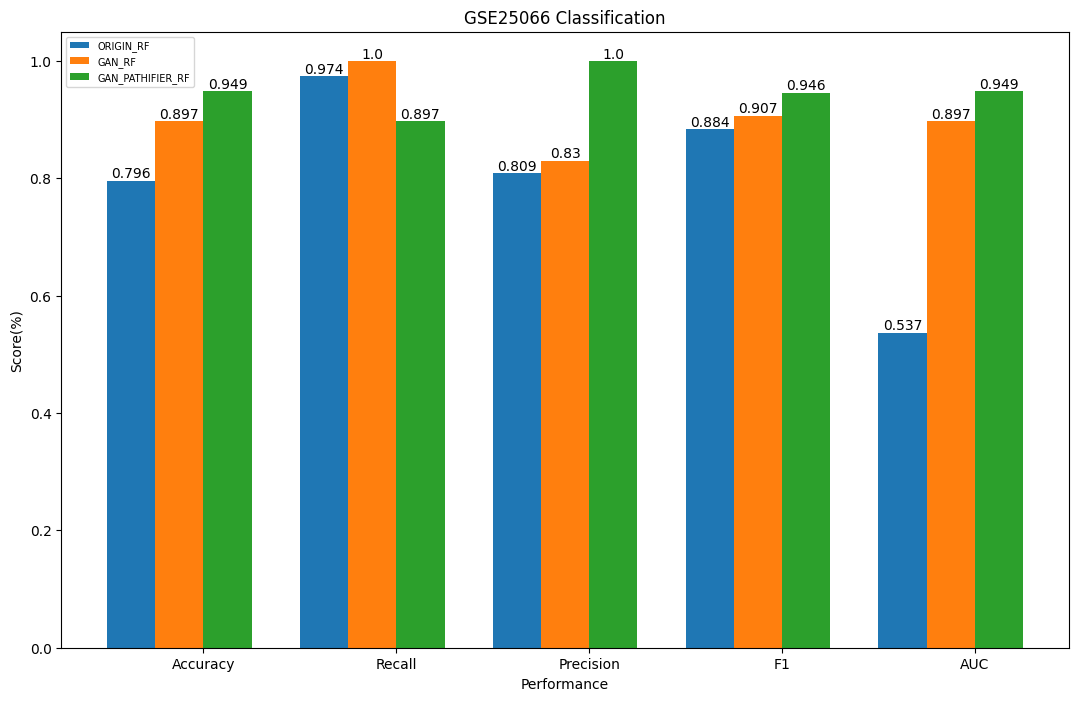

In [21]:
plot_preference(X=X, 
                X_labels=X_labels,
                origin_score=origin_score,
                gan_score=gan_score,
                gan_pathifier_score=gan_pathifier_score,
                title='GSE25066 Classification'
               )

# 使用其他分类器对比

In [22]:
from sklearn.svm import SVC

def train_model(X, y, n_splits=8, test=0.2, random_state=42, n_estimators=200, model='rf'):
    # 创建一个随机森林分类器
    rf_classifier = RandomForestClassifier(random_state=random_state, n_estimators=n_estimators)
    
    # 设置K-fold交叉验证策略
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    X_len = len(X)
    t = int((1-test)*X_len)
    print(f'n_splits:{n_splits},test_data:{test},random_state:{random_state},n_estimators:{n_estimators}')
    num_samples = X.shape[0]

    # 生成随机排列索引
    np.random.seed(random_state)
    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test, stratify=y, random_state=random_state)
    # 定义要计算的分类指标
    scoring = {
        'Accuracy': 'accuracy',
        'Recall': 'recall',
        'Precision': 'precision',
        'F1': 'f1',
        'Auc': 'roc_auc'
    }
    score_train = {}
    score_test = {}
    print(X.shape,X_train.shape,X_test.shape)
    for metric_name, metric_func in scoring.items():
        metric_scores = cross_val_score(rf_classifier, X_train, y_train, cv=cv, scoring=metric_func, n_jobs=-1)
        avg_metric_score = metric_scores.mean()
        score_train[metric_name] = round(avg_metric_score, 3)
        print(f'validation: {metric_name}: {avg_metric_score:.3f}')
    # 选择最佳模型参数设置
    best_model_params = rf_classifier.get_params() 
    # 使用最佳参数设置重新训练模型
    best_model = RandomForestClassifier(**best_model_params)
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    score_test['Accuracy'] = round(accuracy_score(y_test, y_pred),3)
    score_test['Recall'] = round(recall_score(y_test, y_pred),3 )
    score_test['Precision'] = round(precision_score(y_test, y_pred),3)
    score_test['F1'] = round(f1_score(y_test, y_pred), 3)
    score_test['Auc'] = round(roc_auc_score(y_test, y_pred), 3)
    print('***********test*************')
    print(score_test)
    # for metric_name, metric_func in scoring.items():
    #     metric_scores = cross_val_score(rf_classifier, X_test, y_test, scoring=metric_func, n_jobs=-1)
    #     avg_metric_score = metric_scores.mean()
    #     score_test[metric_name] = round(avg_metric_score, 3)
    #     print(f'test: {metric_name}: {avg_metric_score:.3f}')
    return score_train, score_test
def select_model(model):
    models = {
        "rf": RandomForestClassifier(),
        "svm": SVC()
    }

# 使用pycaret训练

## 读取原始数据

In [53]:
import pandas as pd
import numpy as np
train_size = 0.9
fold = 8

In [54]:
origin_data = pd.read_csv('Liver_merge.csv')

In [55]:
from pycaret.classification import ClassificationExperiment
s = ClassificationExperiment()
s.set_config('seed', 42)
s.setup(origin_data,
        target = 'group', 
        session_id = 42, 
        train_size=train_size,
        fold_strategy='kfold',
        fold=fold
       )

,Description,Value
0,Session id,42
1,Target,group
2,Target type,Binary
3,Original data shape,"(421, 11886)"
4,Transformed data shape,"(421, 11886)"
5,Transformed train set shape,"(378, 11886)"
6,Transformed test set shape,"(43, 11886)"
7,Numeric features,11885
8,Preprocess,True
9,Imputation type,simple


In [56]:
s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9895,0.9988,0.9882,1.0000,0.9940,0.9483,0.9508,0.6738
lr,Logistic Regression,0.9894,0.9976,0.9882,1.0000,0.9940,0.9466,0.9492,1.2638
ridge,Ridge Classifier,0.9894,0.0000,0.9882,1.0000,0.9940,0.9466,0.9492,0.6025
ada,Ada Boost Classifier,0.9868,0.9924,0.9911,0.9940,0.9925,0.9330,0.9355,3.0200
knn,K Neighbors Classifier,0.9842,0.9936,0.9822,1.0000,0.9910,0.9258,0.9299,0.5875
et,Extra Trees Classifier,0.9841,0.9981,0.9911,0.9911,0.9910,0.9189,0.9229,0.4938
svm,SVM - Linear Kernel,0.9814,0.0000,0.9852,0.9938,0.9894,0.9128,0.9160,0.5775
rf,Random Forest Classifier,0.9814,0.9985,0.9943,0.9850,0.9895,0.9048,0.9095,0.6762
gbc,Gradient Boosting Classifier,0.9736,0.9941,0.9852,0.9853,0.9851,0.8640,0.8710,9.9825
lightgbm,Light Gradient Boosting Machine,0.9735,0.9971,0.9882,0.9822,0.9850,0.8586,0.8630,5.9462


LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

## 使用gan生成的平衡数据

In [57]:
gan_data = pd.read_csv('gan_Liver.csv')
gan_data

,A1BG,A2LD1,A2M,A4GALT,AAAS,AACS,AAGAB,AAK1,AAMP,AARS2,...,ZW10,ZWILCH,ZWINT,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3,group
0,16.903097,8.715260,16.837369,6.064562,9.365117,7.352139,9.069857,8.784455,11.415891,8.267119,...,8.452833,6.605290,6.043189,9.375843,9.384367,10.900427,11.427795,8.922543,8.901912,0.0
1,16.042797,8.713328,16.932478,6.033643,8.947604,6.721176,8.890053,9.139745,11.211142,7.529446,...,8.423790,6.757122,4.821338,9.254951,10.339537,11.014054,11.993706,9.710529,8.799178,0.0
2,16.251136,8.012606,17.869616,7.463284,9.140778,7.108619,9.200250,8.637313,11.241951,7.660811,...,8.608334,6.459951,4.762843,9.205788,9.931098,10.065102,10.875718,8.499810,9.616674,0.0
3,16.501291,8.284755,16.812427,7.136263,8.996256,7.515416,9.152846,9.349093,11.335538,8.014518,...,8.320020,6.429556,5.402074,10.358953,9.778451,10.949562,12.253583,8.632372,9.000843,0.0
4,16.399463,8.103829,16.814177,6.535796,9.308386,7.769594,9.242388,8.917900,11.452892,8.181746,...,8.066311,6.134584,6.066311,9.753889,9.655890,10.635777,12.043885,9.098322,8.693798,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,13.589894,9.337051,13.183481,9.305174,10.659041,9.728997,10.384562,9.720572,11.029023,10.304235,...,10.181251,9.838455,9.166183,10.178794,10.458627,10.703332,10.828924,10.247210,10.225082,0.0
738,13.536341,9.479577,13.422260,9.424850,10.784612,9.865892,10.314266,9.595171,11.174696,10.166624,...,9.809552,9.701748,9.010886,10.438852,10.428571,10.950298,10.860692,10.031444,10.284664,0.0
739,13.817484,9.286361,13.532031,9.504230,10.724981,9.793881,10.305278,9.672647,11.165280,9.935654,...,9.956368,9.557275,9.108200,10.264177,10.510122,10.744174,10.643708,10.204868,10.150307,0.0
740,13.716986,9.194677,13.604954,9.556050,10.762415,9.846568,10.137026,9.632738,11.145919,10.388307,...,9.792408,9.586435,9.159556,10.084065,10.493257,11.020835,10.758987,9.908797,10.192752,0.0


In [58]:
s2 = ClassificationExperiment()
s2.set_config('seed', 42)
s2.setup(gan_data, 
         target = 'group', 
         session_id = 42, 
         train_size=train_size, 
         fold_strategy='kfold',
         fold=fold
        )

,Description,Value
0,Session id,42
1,Target,group
2,Target type,Binary
3,Original data shape,"(742, 11886)"
4,Transformed data shape,"(742, 11886)"
5,Transformed train set shape,"(667, 11886)"
6,Transformed test set shape,"(75, 11886)"
7,Numeric features,11885
8,Preprocess,True
9,Imputation type,simple


In [59]:
s2.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9940,0.9999,0.9878,1.0000,0.9938,0.9878,0.9879,1.5000
ridge,Ridge Classifier,0.9940,0.0000,0.9878,1.0000,0.9938,0.9878,0.9879,0.3713
et,Extra Trees Classifier,0.9880,0.9998,0.9878,0.9878,0.9878,0.9757,0.9759,0.4888
rf,Random Forest Classifier,0.9865,0.9997,0.9878,0.9853,0.9865,0.9726,0.9727,0.5362
ada,Ada Boost Classifier,0.9865,0.9998,0.9815,0.9909,0.9860,0.9727,0.9730,5.1325
knn,K Neighbors Classifier,0.9850,0.9967,0.9727,0.9972,0.9846,0.9695,0.9701,0.4125
gbc,Gradient Boosting Classifier,0.9835,0.9979,0.9823,0.9848,0.9834,0.9666,0.9670,21.5088
lightgbm,Light Gradient Boosting Machine,0.9820,0.9992,0.9831,0.9818,0.9823,0.9637,0.9641,14.3412
dt,Decision Tree Classifier,0.9805,0.9811,0.9888,0.9737,0.9809,0.9608,0.9614,0.5913
lda,Linear Discriminant Analysis,0.9580,0.9782,0.9618,0.9560,0.9585,0.9151,0.9159,1.1438


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 读取pathways score

In [60]:
ptways_data = pd.read_csv('Liver_Pathways.csv')
ptways_data

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P285,P286,P287,P288,P289,P290,P291,P292,P293,group
0,0.580165,0.410830,0.674069,0.000000,0.420832,0.402185,0.329498,0.610798,0.640273,0.690960,...,0.378230,0.510120,0.435090,0.439994,0.362262,0.473969,0.371231,0.373564,0.282004,0
1,0.580456,0.403640,0.669764,0.062544,0.453088,0.412050,0.330564,0.684060,0.629187,0.684810,...,0.458395,0.564218,0.545280,0.549961,0.458955,0.474219,0.361657,0.371335,0.383963,0
2,0.581873,0.430934,0.694590,0.070355,0.450293,0.417977,0.312309,0.742605,0.613431,0.683769,...,0.434171,0.541537,0.489683,0.497449,0.432156,0.477621,0.362418,0.365382,0.332537,0
3,0.571632,0.408460,0.686018,0.069721,0.471856,0.425381,0.327418,0.750423,0.625285,0.684474,...,0.399935,0.531839,0.430862,0.437929,0.396525,0.526101,0.423873,0.423795,0.281571,0
4,0.567762,0.389851,0.660240,0.064660,0.430836,0.408004,0.319520,0.743095,0.636739,0.684810,...,0.456845,0.552649,0.539070,0.543880,0.471590,0.489791,0.369913,0.380522,0.373096,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,0.653290,0.590181,0.608644,0.123855,0.418895,0.305014,0.307693,0.595838,0.531199,0.590671,...,0.280125,0.279717,0.345660,0.359623,0.217504,0.439548,0.345195,0.350671,0.190925,1
738,0.482727,0.514109,0.486381,0.182614,0.273718,0.279008,0.177301,0.530906,0.723537,0.522119,...,0.460993,0.460845,0.563451,0.573607,0.391574,0.292604,0.442300,0.479464,0.391648,1
739,0.564962,0.443016,0.661255,0.002343,0.391081,0.388466,0.381591,0.613906,0.659894,0.769128,...,0.249018,0.157924,0.256978,0.272135,0.173823,0.421144,0.266048,0.328435,0.082833,1
740,0.636767,0.562377,0.645551,0.166691,0.419554,0.371418,0.360586,0.600800,0.411877,0.566469,...,0.318477,0.501299,0.555568,0.556741,0.457843,0.465358,0.373740,0.371315,0.371254,1


In [61]:
s3 = ClassificationExperiment()
s3.set_config('seed', 42)
s3.setup(ptways_data, 
         target = 'group', 
         session_id = 44, 
         train_size=train_size, 
         fold_strategy='kfold',
         fold=fold
        )

,Description,Value
0,Session id,44
1,Target,group
2,Target type,Binary
3,Original data shape,"(742, 294)"
4,Transformed data shape,"(742, 294)"
5,Transformed train set shape,"(667, 294)"
6,Transformed test set shape,"(75, 294)"
7,Numeric features,293
8,Preprocess,True
9,Imputation type,simple


In [63]:
s3.compare_models(cross_validation=False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0400
knn,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0300
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0700
svm,SVM - Linear Kernel,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0500
ridge,Ridge Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0700
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0600
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0400
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0400
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0600
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0500


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=44, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)